### F5-exp1 vs. F5-sugar vs. groebner

08/06/2022

params:
 - full dataset: biomodels, systemsolving,  doi
 - machine: alfred
 - script: `~/signature-based-gb/f5$ rbench.py run -j9 --ulimit 300 --bar -f --reduce $trunk --lisp boot {...} {...}`

$\textbf{Note that this notebook was produced with VS Code Jupyter Extension (not with alfred anaconda)}$ 

Hence, red lines in the plots are cropped as they were before

In [105]:
import matplotlib.pyplot as plt

In [106]:
import pandas as pd

In [107]:
# otherwise, VS Code does not see rbench.py, for some reason 
import sys; sys.path.append('/home/ademin/reduce-algebra-code/generic/rbench')
import rbench as rb

In [108]:
groebner = rb.read_filetree('../benchmark-results/groebner/full-2022-06-08', 'groebner').select('boot').deselect(['heapsize', 'valid'])

In [109]:
groebner.head(3)

groebner                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-06-08 10:36:50+02:00     1.25     0.0   
biomodels/BIOMD0000000003 2022-06-08 10:36:35+02:00     0.01     0.0   
biomodels/BIOMD0000000006 2022-06-08 10:36:50+02:00     0.00     0.0   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-06-08 10:36:52+02:00  
biomodels/BIOMD0000000003          NaN 2022-06-08 10:36:35+02:00  
biomodels/BIOMD0000000006          NaN 2022-06-08 10:36:50+02:00

In [110]:
f5sugar = rb.read_filetree('../benchmark-results/f5/full-sugar-2022-06-08', 'f5-sugar').select('boot').deselect(['heapsize', 'valid'])

In [111]:
f5sugar.head(3)

f5-sugar                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-06-08 10:04:02+02:00     0.54    0.00   
biomodels/BIOMD0000000003 2022-06-08 10:09:06+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-06-08 10:09:00+02:00     0.00    0.02   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-06-08 10:04:02+02:00  
biomodels/BIOMD0000000003          NaN 2022-06-08 10:09:06+02:00  
biomodels/BIOMD0000000006          NaN 2022-06-08 10:09:00+02:00

In [112]:
f5 = rb.read_filetree('../benchmark-results/f5/full-2022-06-08', 'f5').select('boot').deselect(['heapsize', 'valid'])

In [113]:
f5.head(3)

f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-06-08 09:39:41+02:00     0.16    0.02   
biomodels/BIOMD0000000003 2022-06-08 09:44:44+02:00     0.02    0.00   
biomodels/BIOMD0000000006 2022-06-08 09:44:37+02:00     0.01    0.01   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-06-08 09:39:41+02:00  
biomodels/BIOMD0000000003          NaN 2022-06-08 09:44:45+02:00  
biomodels/BIOMD0000000006          NaN 2022-06-08 09:44:37+02:00

In [122]:
f5exp7 = rb.read_filetree('../benchmark-results/f5/experiment-7-2022-06-08', 'f5-exp7').select('boot').deselect(['heapsize', 'valid'])

In [123]:
f5exp7.head(3)

f5-exp7                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-06-08 21:18:27+02:00     0.17    0.02   
biomodels/BIOMD0000000003 2022-06-08 21:18:45+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-06-08 21:18:35+02:00     0.00    0.01   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-06-08 21:18:27+02:00  
biomodels/BIOMD0000000003          NaN 2022-06-08 21:18:45+02:00  
biomodels/BIOMD0000000006          NaN 2022-06-08 21:18:36+02:00

In [124]:
combo = f5sugar.join([f5exp7, groebner], how='inner')

In [125]:
combo.head(3)

f5-sugar                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-06-08 10:04:02+02:00     0.54    0.00   
biomodels/BIOMD0000000003 2022-06-08 10:09:06+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-06-08 10:09:00+02:00     0.00    0.02   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000002          NaN 2022-06-08 10:04:02+02:00   
biomodels/BIOMD0000000003          NaN 2022-06-08 10:09:06+02:00   
biomodels/BIOMD0000000006          NaN 2022-06-08 10:09:00+02:00   

                                            f5-exp7                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-06-08 21:18:27+02:00     0.17    0.02   
biomodels/BIOMD0000000003 2022-06-08 21:18:45+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-06-08 21:18:35+02:00     0.00    0.01   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000002          NaN 2022-06-08 21:18:27+02:00   
biomodels/BIOMD0000000003          NaN 2022-06-08 21:18:45+02:00   
biomodels/BIOMD0000000006          NaN 2022-06-08 21:18:36+02:00   

                                           groebner                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-06-08 10:36:50+02:00     1.25     0.0   
biomodels/BIOMD0000000003 2022-06-08 10:36:35+02:00     0.01     0.0   
biomodels/BIOMD0000000006 2022-06-08 10:36:50+02:00     0.00     0.0   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-06-08 10:36:52+02:00  
biomodels/BIOMD0000000003          NaN 2022-06-08 10:36:35+02:00  
biomodels/BIOMD0000000006          NaN 2022-06-08 10:36:50+02:00

In [126]:
combo.slow(0.5)

f5-sugar  \
                                                                 start_boot   
biomodels/BIOMD0000000002                         2022-06-08 10:04:02+02:00   
biomodels/BIOMD0000000038                         2022-06-08 10:09:11+02:00   
biomodels/BIOMD0000000046                         2022-06-08 10:09:04+02:00   
biomodels/BIOMD0000000085                         2022-06-08 10:08:53+02:00   
biomodels/BIOMD0000000086                         2022-06-08 10:09:01+02:00   
biomodels/BIOMD0000000102                         2022-06-08 10:04:02+02:00   
biomodels/BIOMD0000000103                         2022-06-08 10:09:03+02:00   
biomodels/BIOMD0000000108                         2022-06-08 10:04:03+02:00   
biomodels/BIOMD0000000123                         2022-06-08 10:08:58+02:00   
biomodels/BIOMD0000000166                         2022-06-08 10:08:57+02:00   
biomodels/BIOMD0000000184                         2022-06-08 10:09:08+02:00   
biomodels/BIOMD0000000291                         2022-06-08 10:09:00+02:00   
biomodels/BIOMD0000000315                         2022-06-08 10:08:58+02:00   
biomodels/BIOMD0000000447                         2022-06-08 10:09:12+02:00   
biomodels/BIOMD0000000637                         2022-06-08 10:09:05+02:00   
biomodels/BIOMD0000000646                         2022-06-08 10:04:09+02:00   
biomodels/BIOMD0000000759                         2022-06-08 10:09:02+02:00   
biomodels/BIOMD0000000769                         2022-06-08 10:09:01+02:00   
doi/10.1016/S0747-7171(86)80014-1/InvGrad/Hairer2 2022-06-08 10:03:59+02:00   
doi/10.1016/S0747-7171(86)80014-1/InvGrad/Hairer3 2022-06-08 10:03:58+02:00   
doi/10.1016/S0747-7171(86)80014-1/InvLex/Hairer2  2022-06-08 10:03:57+02:00   
doi/10.1016/S0747-7171(86)80014-1/InvLex/Hairer3  2022-06-08 10:03:58+02:00   
doi/10.1145/120694.120701/DegRevLex/Gerdt1        2022-06-08 10:03:57+02:00   
doi/10.1145/120694.120701/DegRevLex/Integ2        2022-06-08 10:03:57+02:00   
doi/10.1145/120694.120701/Lex/Arnborg             2022-06-08 10:03:56+02:00   
doi/10.1145/120694.120701/Lex/CycRoot             2022-06-08 10:03:56+02:00   
doi/10.1145/120694.120701/Lex/Gerdt1              2022-06-08 10:03:56+02:00   
doi/10.1145/120694.120701/Lex/Gerdt3              2022-06-08 10:03:56+02:00   
doi/10.1145/120694.120701/Lex/Integ1              2022-06-08 10:03:56+02:00   
doi/10.1145/120694.120701/Lex/Integ2              2022-06-08 10:03:56+02:00   
doi/10.1145/120694.120701/Lex/Katsura             2022-06-08 10:03:56+02:00   
doi/10.1145/120694.120701/Lex/ParCurv             2022-06-08 10:03:56+02:00   
systemsolving/cassou                              2022-06-08 10:14:19+02:00   
systemsolving/eco7                                2022-06-08 10:14:16+02:00   
systemsolving/hairer2                             2022-06-08 10:10:40+02:00   
systemsolving/henrion5                            2022-06-08 10:14:04+02:00   
systemsolving/henrion6                            2022-06-08 10:09:44+02:00   
systemsolving/katsura6                            2022-06-08 10:10:36+02:00   
systemsolving/katsura7                            2022-06-08 10:14:13+02:00   
systemsolving/kinema                              2022-06-08 10:14:09+02:00   
systemsolving/nbody4                              2022-06-08 10:13:54+02:00   
systemsolving/nbody4sym                           2022-06-08 10:13:58+02:00   
systemsolving/nbody5                              2022-06-08 10:14:31+02:00   
systemsolving/noon5                               2022-06-08 10:14:17+02:00   
systemsolving/noon6                               2022-06-08 10:14:30+02:00   
systemsolving/noon7                               2022-06-08 10:14:08+02:00   
systemsolving/noon8                               2022-06-08 10:14:17+02:00   
systemsolving/root10                              2022-06-08 10:14:39+02:00   
systemsolving/root11                              2022-06-08 10:14:02+02:00   
systemsolving/root12                  

### F5-sugar vs. F5-exp1

In [127]:
combo.describe()

f5-sugar                              f5-exp7              \
         cpu_boot     gc_boot sigxcpu_boot    cpu_boot     gc_boot   
count  200.000000  200.000000         22.0  200.000000  200.000000   
mean     1.679950    0.009150        300.0    3.505000    0.008400   
std      9.745725    0.006557          0.0   23.731158    0.006454   
min      0.000000    0.000000        300.0    0.000000    0.000000   
25%      0.007500    0.000000        300.0    0.010000    0.000000   
50%      0.010000    0.010000        300.0    0.010000    0.010000   
75%      0.020000    0.010000        300.0    0.020000    0.010000   
max     95.360000    0.020000        300.0  232.820000    0.020000   

                      groebner                           
      sigxcpu_boot    cpu_boot     gc_boot sigxcpu_boot  
count         22.0  207.000000  207.000000         15.0  
mean         300.0    4.261932    0.003092        300.0  
std            0.0   23.041170    0.004736          0.0  
min          300.0    0.000000    0.000000        300.0  
25%          300.0    0.010000    0.000000        300.0  
50%          300.0    0.010000    0.000000        300.0  
75%          300.0    0.030000    0.010000        300.0  
max          300.0  230.340000    0.020000        300.0

<AxesSubplot:xlabel='f5-sugar', ylabel='f5-exp1'>

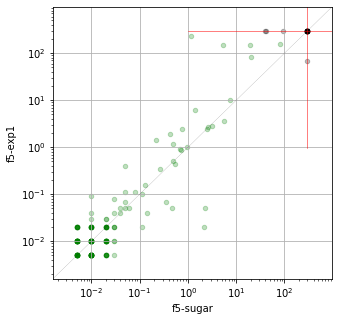

In [55]:
combo.plot.scatter1(x='f5-sugar', y='f5-exp1', c='cpu_boot')

### F5 vs. groebner

<AxesSubplot:xlabel='f5-exp1', ylabel='groebner'>

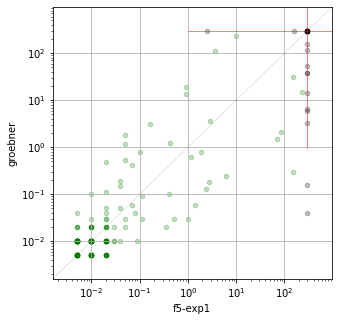

In [58]:
combo.plot.scatter1(x='f5-exp1', y='groebner', c='cpu_boot')

### F5-sugar vs. groebner

<AxesSubplot:xlabel='f5-sugar', ylabel='groebner'>

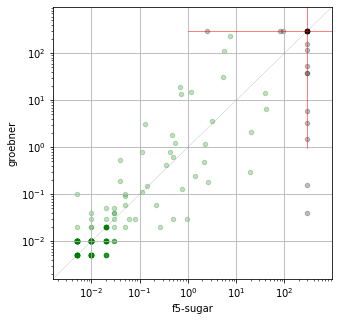

In [19]:
combo.plot.scatter1(x='f5-sugar', y='groebner', c='cpu_boot')

### models to look at closely:

In [32]:
combo.loc[['systemsolving/root10']]

f5-sugar                                \
                                    start_boot cpu_boot gc_boot sigxcpu_boot   
systemsolving/root10 2022-06-08 10:14:39+02:00     0.67    0.02          NaN   

                                                                 f5-exp1  \
                                      end_boot                start_boot   
systemsolving/root10 2022-06-08 10:14:40+02:00 2022-06-08 15:15:05+02:00   

                                                                              \
                     cpu_boot gc_boot sigxcpu_boot                  end_boot   
systemsolving/root10    10.84     0.0          NaN 2022-06-08 15:15:16+02:00   

                                      groebner                                \
                                    start_boot cpu_boot gc_boot sigxcpu_boot   
systemsolving/root10 2022-06-08 10:31:08+02:00    18.92     0.0          NaN   

                                                
                                      end_boot  
systemsolving/root10 2022-06-08 10:31:28+02:00

In [33]:
combo.loc[['biomodels/BIOMD0000000184']]

f5-sugar                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000184 2022-06-08 10:09:08+02:00      NaN     NaN   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000184        300.0 2022-06-08 10:14:09+02:00   

                                            f5-exp1                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000184 2022-06-08 15:09:25+02:00      NaN     NaN   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000184        300.0 2022-06-08 15:14:26+02:00   

                                           groebner                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000184 2022-06-08 10:36:32+02:00     0.04     0.0   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000184          NaN 2022-06-08 10:36:32+02:00

### (At least one of f5,f5-sugar are nan) & (groebner is not nan)

In [39]:
combo_nans = combo[
    ~(combo[('f5-sugar', 'cpu_boot')].isna()) & (combo[('f5-exp1', 'cpu_boot')].isna())
]
combo_nans

f5-sugar                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000123 2022-06-08 10:08:58+02:00    95.36     0.0   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000123          NaN 2022-06-08 10:10:35+02:00   

                                            f5-exp1                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000123 2022-06-08 15:09:18+02:00      NaN     NaN   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000123        300.0 2022-06-08 15:14:16+02:00   

                                           groebner                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000123 2022-06-08 10:36:53+02:00      NaN     NaN   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000123        300.0 2022-06-08 10:41:55+02:00

### (At least one of f5,f5-sugar,groebner is nan) \ (all f5,sugar,groebner are nan):

In [23]:
combo_nans = combo[
    (combo[('f5', 'cpu_boot')].isna() | combo[('f5-sugar', 'cpu_boot')].isna() | combo[('groebner', 'cpu_boot')].isna()) &
    ~(combo[('f5', 'cpu_boot')].isna() & combo[('f5-sugar', 'cpu_boot')].isna() & combo[('groebner', 'cpu_boot')].isna())
]
combo_nans

f5  \
                                                                 start_boot   
biomodels/BIOMD0000000102                         2022-06-08 09:39:42+02:00   
biomodels/BIOMD0000000123                         2022-06-08 09:44:35+02:00   
biomodels/BIOMD0000000184                         2022-06-08 09:44:46+02:00   
biomodels/BIOMD0000000447                         2022-06-08 09:44:53+02:00   
doi/10.1016/S0747-7171(86)80014-1/InvGrad/Hairer2 2022-06-08 09:39:35+02:00   
doi/10.1145/120694.120701/Lex/Integ2              2022-06-08 09:39:33+02:00   
doi/10.1145/120694.120701/Lex/Katsura             2022-06-08 09:39:33+02:00   
systemsolving/henrion6                            2022-06-08 09:47:03+02:00   
systemsolving/katsura7                            2022-06-08 09:49:51+02:00   
systemsolving/nbody4                              2022-06-08 09:49:32+02:00   
systemsolving/nbody5                              2022-06-08 09:50:17+02:00   
systemsolving/noon8                               2022-06-08 09:49:56+02:00   
systemsolving/root12                              2022-06-08 09:45:16+02:00   

                                                                    \
                                                  cpu_boot gc_boot   
biomodels/BIOMD0000000102                              NaN     NaN   
biomodels/BIOMD0000000123                           149.16    0.01   
biomodels/BIOMD0000000184                              NaN     NaN   
biomodels/BIOMD0000000447                              NaN     NaN   
doi/10.1016/S0747-7171(86)80014-1/InvGrad/Hairer2      NaN     NaN   
doi/10.1145/120694.120701/Lex/Integ2                   NaN     NaN   
doi/10.1145/120694.120701/Lex/Katsura               145.28    0.02   
systemsolving/henrion6                              232.21    0.01   
systemsolving/katsura7                              259.28    0.01   
systemsolving/nbody4                                   NaN     NaN   
systemsolving/nbody5                                   NaN     NaN   
systemsolving/noon8                                  57.59    0.01   
systemsolving/root12                                   NaN     NaN   

                                                                \
                                                  sigxcpu_boot   
biomodels/BIOMD0000000102                                300.0   
biomodels/BIOMD0000000123                                  NaN   
biomodels/BIOMD0000000184                                300.0   
biomodels/BIOMD0000000447                                300.0   
doi/10.1016/S0747-7171(86)80014-1/InvGrad/Hairer2        300.0   
doi/10.1145/120694.120701/Lex/Integ2                     300.0   
doi/10.1145/120694.120701/Lex/Katsura                      NaN   
systemsolving/henrion6                                     NaN   
systemsolving/katsura7                                     NaN   
systemsolving/nbody4                                     300.0   
systemsolving/nbody5                                     300.0   
systemsolving/noon8                                        NaN   
systemsolving/root12                                     300.0   

                                                                             \
                                                                   end_boot   
biomodels/BIOMD0000000102                         2022-06-08 09:44:43+02:00   
biomodels/BIOMD0000000123                         2022-06-08 09:47:07+02:00   
biomodels/BIOMD0000000184                         2022-06-08 09:49:47+02:00   
biomodels/BIOMD0000000447                         2022-06-08 09:49:54+02:00   
doi/10.1016/S0747-7171(86)80014-1/InvGrad/Hairer2 2022-06-08 09:44:36+02:00   
doi/10.1145/120694.120701/Lex/Integ2              2022-06-08 09:44:33+02:00   
doi/10.1145/120694.120701/Lex/Katsura             2022-06-08 09:41:56+02:00   
systemsolving/henrion6                            2022-06-08 09:51:00+02:00   
systemsolving/katsura7                            2022-

### Describe without nans

In [24]:
combo.dropna(subset=[('f5-sugar', 'cpu_boot'), ('f5', 'cpu_boot'), ('groebner', 'cpu_boot')]).describe()

f5                             f5-sugar              \
         cpu_boot     gc_boot sigxcpu_boot    cpu_boot     gc_boot   
count  197.000000  197.000000          0.0  197.000000  197.000000   
mean     0.905025    0.007970          NaN    0.808173    0.009137   
std      5.194793    0.006303          NaN    4.520602    0.006528   
min      0.000000    0.000000          NaN    0.000000    0.000000   
25%      0.010000    0.000000          NaN    0.000000    0.000000   
50%      0.010000    0.010000          NaN    0.010000    0.010000   
75%      0.020000    0.010000          NaN    0.020000    0.010000   
max     53.410000    0.020000          NaN   41.210000    0.020000   

                      groebner                           
      sigxcpu_boot    cpu_boot     gc_boot sigxcpu_boot  
count          0.0  197.000000  197.000000          0.0  
mean           NaN    2.349898    0.003046          NaN  
std            NaN   18.458417    0.004723          NaN  
min            NaN    0.000000    0.000000          NaN  
25%            NaN    0.010000    0.000000          NaN  
50%            NaN    0.010000    0.000000          NaN  
75%            NaN    0.020000    0.010000          NaN  
max            NaN  230.340000    0.020000          NaN

In [26]:
combo.slow(1.0)

f5  \
                                                                 start_boot   
biomodels/BIOMD0000000002                         2022-06-08 09:39:41+02:00   
biomodels/BIOMD0000000038                         2022-06-08 09:44:51+02:00   
biomodels/BIOMD0000000046                         2022-06-08 09:44:42+02:00   
biomodels/BIOMD0000000085                         2022-06-08 09:44:31+02:00   
biomodels/BIOMD0000000086                         2022-06-08 09:44:37+02:00   
biomodels/BIOMD0000000102                         2022-06-08 09:39:42+02:00   
biomodels/BIOMD0000000103                         2022-06-08 09:44:39+02:00   
biomodels/BIOMD0000000108                         2022-06-08 09:41:56+02:00   
biomodels/BIOMD0000000123                         2022-06-08 09:44:35+02:00   
biomodels/BIOMD0000000166                         2022-06-08 09:44:33+02:00   
biomodels/BIOMD0000000184                         2022-06-08 09:44:46+02:00   
biomodels/BIOMD0000000291                         2022-06-08 09:44:37+02:00   
biomodels/BIOMD0000000315                         2022-06-08 09:44:34+02:00   
biomodels/BIOMD0000000447                         2022-06-08 09:44:53+02:00   
biomodels/BIOMD0000000637                         2022-06-08 09:44:43+02:00   
biomodels/BIOMD0000000646                         2022-06-08 09:42:02+02:00   
biomodels/BIOMD0000000759                         2022-06-08 09:44:39+02:00   
doi/10.1016/S0747-7171(86)80014-1/InvGrad/Hairer2 2022-06-08 09:39:35+02:00   
doi/10.1016/S0747-7171(86)80014-1/InvGrad/Hairer3 2022-06-08 09:39:35+02:00   
doi/10.1016/S0747-7171(86)80014-1/InvLex/Hairer2  2022-06-08 09:39:34+02:00   
doi/10.1016/S0747-7171(86)80014-1/InvLex/Hairer3  2022-06-08 09:39:34+02:00   
doi/10.1145/120694.120701/DegRevLex/Gerdt1        2022-06-08 09:39:34+02:00   
doi/10.1145/120694.120701/DegRevLex/Integ2        2022-06-08 09:39:33+02:00   
doi/10.1145/120694.120701/Lex/Arnborg             2022-06-08 09:39:33+02:00   
doi/10.1145/120694.120701/Lex/CycRoot             2022-06-08 09:39:33+02:00   
doi/10.1145/120694.120701/Lex/Gerdt3              2022-06-08 09:39:33+02:00   
doi/10.1145/120694.120701/Lex/Integ2              2022-06-08 09:39:33+02:00   
doi/10.1145/120694.120701/Lex/Katsura             2022-06-08 09:39:33+02:00   
systemsolving/cassou                              2022-06-08 09:50:05+02:00   
systemsolving/hairer2                             2022-06-08 09:47:11+02:00   
systemsolving/henrion5                            2022-06-08 09:49:40+02:00   
systemsolving/henrion6                            2022-06-08 09:47:03+02:00   
systemsolving/katsura6                            2022-06-08 09:47:08+02:00   
systemsolving/katsura7                            2022-06-08 09:49:51+02:00   
systemsolving/kinema                              2022-06-08 09:49:47+02:00   
systemsolving/nbody4                              2022-06-08 09:49:32+02:00   
systemsolving/nbody4sym                           2022-06-08 09:49:35+02:00   
systemsolving/nbody5                              2022-06-08 09:50:17+02:00   
systemsolving/noon6                               2022-06-08 09:50:17+02:00   
systemsolving/noon7                               2022-06-08 09:49:45+02:00   
systemsolving/noon8                               2022-06-08 09:49:56+02:00   
systemsolving/root10                              2022-06-08 09:50:18+02:00   
systemsolving/root11                              2022-06-08 09:49:38+02:00   
systemsolving/root12                              2022-06-08 09:45:16+02:00   
systemsolving/root9                               2022-06-08 09:49:55+02:00   

                                                                    \
                                                  cpu_boot gc_boot   
biomodels/BIOMD0000000002                             0.16    0.02   
biomodels/BIOMD0000000038                             1.76    0.02   
biomodels/BIOMD0000000046                             3.11    0.01   
biomodels